In [10]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
# Read the dataset
data = pd.read_csv("NSSO68.csv")

# Create a binary variable for non-vegetarian status
data['non_veg'] = data[['eggsno_q', 'fishprawn_q', 'goatmeat_q', 'beef_q', 'pork_q', 'chicken_q', 'othrbirds_q']].apply(lambda x: 1 if any(x > 0) else 0, axis=1)


C:\Users\user\AppData\Local\Temp\ipykernel_14904\2844713750.py:2: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("NSSO68.csv")


In [12]:
# Select relevant variables for the probit model
independent_vars = ['Age', 'Sex', 'hhdsz', 'Religion', 'Education', 'MPCE_URP', 'state', 'State_Region']
X = data[independent_vars]
y = data['non_veg']

# Remove rows with NA values in the selected columns
X = X.dropna()
y = y.loc[X.index]

# Add a constant term to the independent variables
X = sm.add_constant(X)

# Fit the probit regression model
probit_model = sm.Probit(y, X).fit()

# Summarize the model
print(probit_model.summary())

Optimization terminated successfully.
         Current function value: 0.577083
         Iterations 6
                          Probit Regression Results                           
Dep. Variable:                non_veg   No. Observations:               101652
Model:                         Probit   Df Residuals:                   101643
Method:                           MLE   Df Model:                            8
Date:                Mon, 01 Jul 2024   Pseudo R-squ.:                 0.08520
Time:                        19:10:51   Log-Likelihood:                -58662.
converged:                       True   LL-Null:                       -64125.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0261      0.029      0.903      0.366      -0.031       0.083
Age             -0.0022

C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


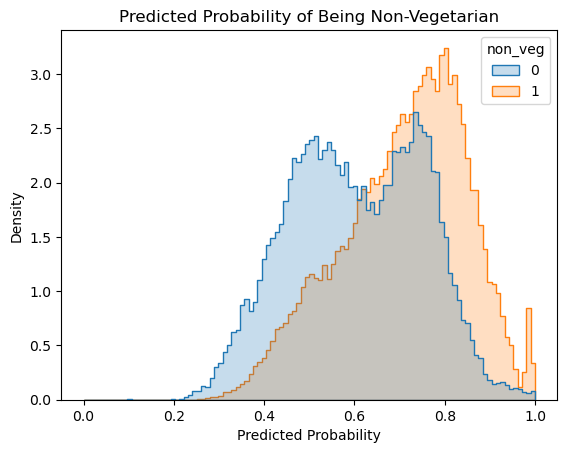

In [13]:
# Make predictions
data['predicted_prob'] = probit_model.predict(X)

# Visualize the results
sns.histplot(data, x='predicted_prob', hue='non_veg', element='step', stat='density', common_norm=False)
plt.title('Predicted Probability of Being Non-Vegetarian')
plt.xlabel('Predicted Probability')
plt.ylabel('Density')
plt.show()